# Stack Overflow 2024 survey data

#### Introduction
The Stack Overflow Developer Survey is the largest and most comprehensive survey of software developers in the world. It's conducted every year by Stack Overflow, a major Q&A platform for programmers.
it dives deep into career paths, compensations, demographic, job satsifaction and fulfillment, industry trends and more!

In [6]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Change default styling for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [7]:
zip_path = '../dataset/2024 Developer Survey.zip'

with zipfile.ZipFile(zip_path) as z:
    with z.open('survey_results_public.csv') as f:
        df = pd.read_csv(f, header=0, sep=',', quotechar='"')

df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


# 1. Whats the buisness need?
We can detect industry trends like coding assistants, languages used, why people code.. etc

to limit the scope and drive meaningful insights, I'm going to explore a set of themes:
1. Use of AI tools.
2. Current Tech salaries.
3. Popularity of remote work.
4. Demographic of developers.
5. Why you code?

# 2. Whats does the data provide?
This is a rich dataset, but for clarity and simplicity sake i'm going to focus on key columns addressing my questions above 

In [8]:
for c in df.columns:
    print(c)

ResponseId
MainBranch
Age
Employment
RemoteWork
Check
CodingActivities
EdLevel
LearnCode
LearnCodeOnline
TechDoc
YearsCode
YearsCodePro
DevType
OrgSize
PurchaseInfluence
BuyNewTool
BuildvsBuy
TechEndorse
Country
Currency
CompTotal
LanguageHaveWorkedWith
LanguageWantToWorkWith
LanguageAdmired
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
DatabaseAdmired
PlatformHaveWorkedWith
PlatformWantToWorkWith
PlatformAdmired
WebframeHaveWorkedWith
WebframeWantToWorkWith
WebframeAdmired
EmbeddedHaveWorkedWith
EmbeddedWantToWorkWith
EmbeddedAdmired
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
MiscTechAdmired
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
ToolsTechAdmired
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
NEWCollabToolsAdmired
OpSysPersonal use
OpSysProfessional use
OfficeStackAsyncHaveWorkedWith
OfficeStackAsyncWantToWorkWith
OfficeStackAsyncAdmired
OfficeStackSyncHaveWorkedWith
OfficeStackSyncWantToWorkWith
OfficeStackSyncAdmired
AISearchDevHaveWorkedWith
AISearchDevWantTo

In [9]:
df = df[[
    # AI Usage
    "AIToolCurrently Using", "AIToolInterested in Using", "AISelect", "AIComplex", "AIThreat",

    # Compensation
    "ConvertedCompYearly", "Country", "DevType", "WorkExp", "YearsCode", "YearsCodePro", "JobSat",

    # Remote Work
    "RemoteWork",

    # Demographics
    "Age", "EdLevel",

    # Motivation
    "CodingActivities"

]]

df.head()

,AIToolCurrently Using,AIToolInterested in Using,AISelect,AIComplex,AIThreat,ConvertedCompYearly,Country,DevType,WorkExp,YearsCode,YearsCodePro,JobSat,RemoteWork,Age,EdLevel,CodingActivities
0,NaN,NaN,Yes,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,Remote,Under 18 years old,Primary/elementary school,Hobby
1,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,"Developer, full-stack",17.0,20,17,NaN,Remote,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Hobby;Contribute to open-source projects;Other...
2,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,Developer Experience,NaN,37,27,NaN,Remote,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Hobby;Contribute to open-source projects;Other...
3,Learning about a codebase;Project planning;Wri...,Testing code;Committing and reviewing code;Pre...,Yes,Bad at handling complex tasks,No,NaN,Canada,"Developer, full-stack",NaN,4,NaN,NaN,NaN,18-24 years old,Some college/university study without earning ...,NaN
4,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,Norway,"Developer, full-stack",NaN,9,NaN,NaN,NaN,18-24 years old,"Secondary school (e.g. American high school, G...",NaN


### In order to produce good work, we need to understand what each column tells us



| Column                        | Meaning / Survey Question                                                                                                                                                                                                         |
| ----------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **AIToolCurrently Using**     | How are you currently using AI.                                                                                                                                          |
| **AIToolInterested in Using** | What are your plans to use AI tools.                                                                                                                                                                         |
| **AISelect**                  | Do you use AI?.                                                                                                                                                                                                                                                                                                                            |
| **AIComplex**                 | Does AI tools handle complex tasks well?.                                                                                                                                                                                   |
| **AIThreat**                  | Whether developers see AI as a threat to their job/function.                                                                                                                                                                      |
| **ConvertedCompYearly**       | Annual compensation in USD (salary + bonuses + perks), normalized across currencies using June 2024 rates  |                                                                                                                                                                                               |
| **DevType**                   | Role or job type (e.g., backend developer, data scientist).                                                                                                                                                                       |
| **WorkExp**                   | Years of professional development experience.                                                                                                                                                                                     |
| **RemoteWork**                | Current remote work status (fully remote, hybrid, in-person).                                                                                                                                                                     |
| **Age**                       | Age group of respondant                                                                                                                                                                               |
| **EdLevel**                   | Highest level of formal education attained (e.g., BA/BS, MA/MS, etc.).                                                                                                                                                            |
| **YearsCode**                 | Total number of years coding (including hobby/learning).                                                                                                                                                                          |
| **YearsCodePro**              | Years coding in a professional or paid context.                                                                                                                                                                                   |
| **CodingActivities**          | Motivations for coding (e.g., hobby, career,learning)                                                                                                                                                     |
| **JobSat**                    |  job satisfaction                                                                                                                                                                 |



### 1. Use of AI tools.


In [10]:
df['AISelect'].value_counts()

AISelect
Yes                        37662
No, and I don't plan to    14837
No, but I plan to soon      8408
Name: count, dtype: int64

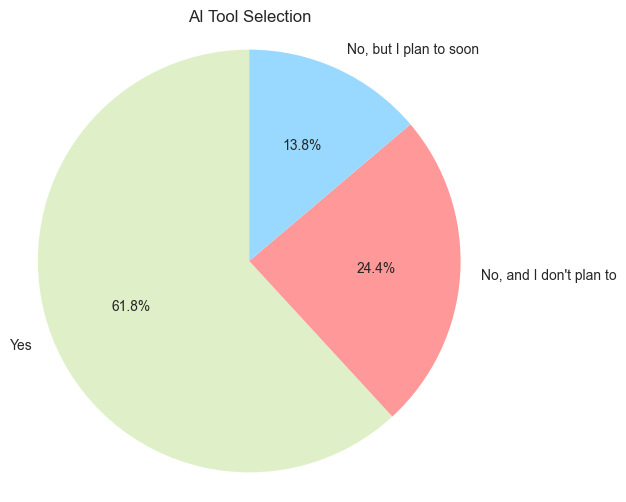

In [11]:
pie_slices = df['AISelect'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    pie_slices,
    labels=pie_slices .index,
    autopct='%.1f%%',
    startangle=90,
    colors=["#dff0c9","#ff9999","#99d8ff"]
)
plt.title('AI Tool Selection')
plt.axis('equal') 
plt.show()

Most participants are using or planning to use AI tools (~%75)

In [12]:
# Lets see what were some of the answers on AI related questions
df['AIToolCurrently Using'].unique().tolist()

[nan,
 'Learning about a codebase;Project planning;Writing code;Documenting code;Debugging and getting help;Deployment and monitoring;Search for answers;Generating content or synthetic data',
 'Writing code;Debugging and getting help',
 'Writing code;Debugging and getting help;Search for answers',
 'Search for answers',
 'Learning about a codebase;Writing code;Documenting code;Debugging and getting help;Search for answers',
 'Learning about a codebase',
 'Writing code;Testing code',
 'Writing code;Documenting code;Testing code;Search for answers;Generating content or synthetic data',
 'Writing code;Documenting code;Debugging and getting help;Committing and reviewing code;Search for answers',
 'Writing code;Documenting code',
 'Learning about a codebase;Writing code;Testing code;Search for answers',
 'Learning about a codebase;Writing code;Debugging and getting help;Testing code;Search for answers;Generating content or synthetic data',
 'Writing code;Search for answers',
 'Debugging and

*Referring to "2024 Developer Survey.pdf"*

For the question AI currently and planned to use we get 10 options and an additional "Other" option where you type in whatever you like

for consistency, we will use only the prewritten options and ignore "Other"

In [13]:
# filter out both fields and create a seperate dataframe
no_other_df = df[
    ~(
        df['AIToolCurrently Using'].fillna('').str.contains('Other') |
        df['AIToolInterested in Using'].fillna('').str.contains('Other')
    )
]

no_other_df

,AIToolCurrently Using,AIToolInterested in Using,AISelect,AIComplex,AIThreat,ConvertedCompYearly,Country,DevType,WorkExp,YearsCode,YearsCodePro,JobSat,RemoteWork,Age,EdLevel,CodingActivities
0,NaN,NaN,Yes,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,Remote,Under 18 years old,Primary/elementary school,Hobby
1,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,"Developer, full-stack",17.0,20,17,NaN,Remote,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Hobby;Contribute to open-source projects;Other...
2,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,Developer Experience,NaN,37,27,NaN,Remote,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Hobby;Contribute to open-source projects;Other...
3,Learning about a codebase;Project planning;Wri...,Testing code;Committing and reviewing code;Pre...,Yes,Bad at handling complex tasks,No,NaN,Canada,"Developer, full-stack",NaN,4,NaN,NaN,NaN,18-24 years old,Some college/university study without earning ...,NaN
4,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,Norway,"Developer, full-stack",NaN,9,NaN,NaN,NaN,18-24 years old,"Secondary school (e.g. American high school, G...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,Learning about a codebase;Project planning;Wri...,Debugging and getting help;Testing code;Deploy...,Yes,"Good, but not great at handling complex tasks",No,NaN,NaN,Blockchain,NaN,5,3,NaN,Remote,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Hobby;School or academic work
65433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Remote,25-34 years old,NaN,Hobby;Contribute to open-source projects
65434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Developer, mobile",NaN,9,5,NaN,In-person,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Hobby
65435,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,Germany,"Developer, back-end",5.0,5,2,NaN,"Hybrid (some remote, some in-person)",18-24 years old,"Secondary school (e.g. American high school, G...",Hobby;Contribute to open-source projects;Profe...


In [14]:
# Lets assume that NaN means not interested in using AI

ai_tools = no_other_df[['AIToolCurrently Using', 'AIToolInterested in Using']].fillna('Not Interested')
ai_tools

,AIToolCurrently Using,AIToolInterested in Using
0,Not Interested,Not Interested
1,Not Interested,Not Interested
2,Not Interested,Not Interested
3,Learning about a codebase;Project planning;Wri...,Testing code;Committing and reviewing code;Pre...
4,Not Interested,Not Interested
...,...,...
65432,Learning about a codebase;Project planning;Wri...,Debugging and getting help;Testing code;Deploy...
65433,Not Interested,Not Interested
65434,Not Interested,Not Interested
65435,Not Interested,Not Interested


Almost ready!

now we need to seperate the values like "Testing code;Committing and reviewing code;..." into individual statements

likely pandas offers .explode() function to do excatly that!

In [15]:
def count_ai_tools(df):
    """
    Simple function to explode, count and combine two columns
    """
    
    currently_using = df['AIToolCurrently Using'].str.split(';').explode()
    currently_using = currently_using.str.strip()  # remove extra spaces
    currently_using_counts = currently_using.value_counts()
    
    interested = df['AIToolInterested in Using'].str.split(';').explode()
    interested = interested.str.strip()  # remove extra spaces
    interested_counts = interested.value_counts()
    
    using_df = pd.DataFrame({
        'Choice': currently_using_counts.index,
        'using': currently_using_counts.values
    })
    
    interested_df = pd.DataFrame({
        'Choice': interested_counts.index,
        'interested': interested_counts.values
    })
    
    final_result = using_df.merge(interested_df, on='Choice', how='inner')
    
    return final_result

ai_tools = count_ai_tools(ai_tools)

ai_tools

,Choice,using,interested
0,Not Interested,30308,34631
1,Writing code,29000,3163
2,Search for answers,23826,6166
3,Debugging and getting help,20026,9100
4,Documenting code,14156,13455
5,Generating content or synthetic data,12226,11637
6,Learning about a codebase,10845,14291
7,Testing code,9581,16257
8,Committing and reviewing code,4601,14391
9,Project planning,4229,11140


Lets make the data talk!!

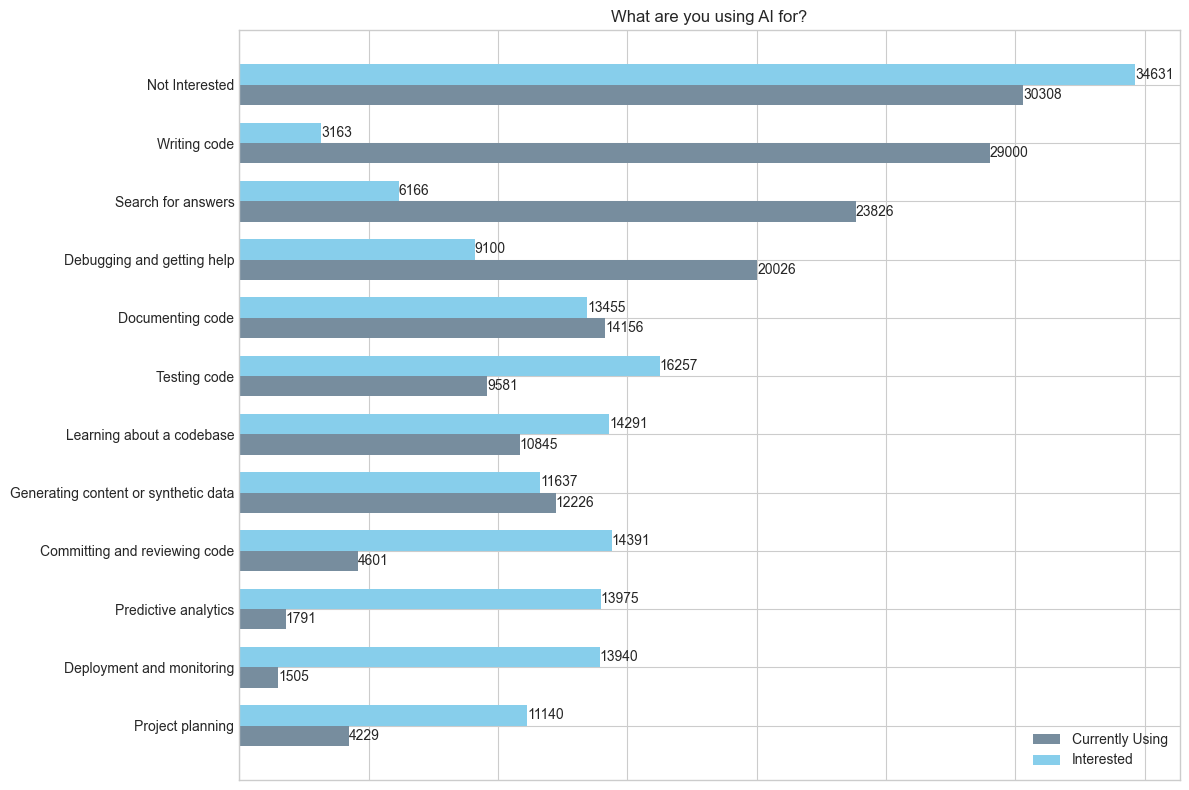

In [16]:
# Sort by total for cleaner look
ai_tools['total'] = ai_tools['using'] + ai_tools['interested']
ai_tools = ai_tools.sort_values('total', ascending=True)

plt.figure(figsize=(12, 8))

# Set up bar positions
y_pos = np.arange(len(ai_tools['Choice']))
bar_height = 0.35

# Make horizontal bars side by side
bars1 = plt.barh(y_pos - bar_height/2, ai_tools['using'], bar_height, label='Currently Using', color = "#778D9E")
bars2 = plt.barh(y_pos + bar_height/2, ai_tools['interested'], bar_height, label='Interested', color = 'skyblue')

# Add data labels on each bar
for bar in bars1:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,  f'{int(width)}', ha='left', va='center')

for bar in bars2:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center')

plt.yticks(y_pos, ai_tools['Choice'])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title('What are you using AI for?')
plt.legend()
plt.tight_layout()
plt.show()

- More than 30k people participated arent intersted or using AI at all, maybe they are skeptical or ignored AI at all either way they are missing out if you ask me.
- almost as much people are using AI for assistance in code generation and refining. 
- and 23k users do search the internet through AI models! a very handy tool indeed.
- there is a high interest in using ai to predict, deploy, commit & review code and project planning, these might be an underexplored areas!



- the rest of the answers show mild usage of AI in daily tasks, specificaly to understand and document codebases, might indicate lack of trust in accuracy or the current models arent mature enough to carry out those tasks.


In [17]:
df['AIComplex'].value_counts()

AIComplex
Good, but not great at handling complex tasks    12102
Bad at handling complex tasks                    11583
Neither good or bad at handling complex tasks     7706
Very poor at handling complex tasks               4415
Very well at handling complex tasks               1215
Name: count, dtype: int64

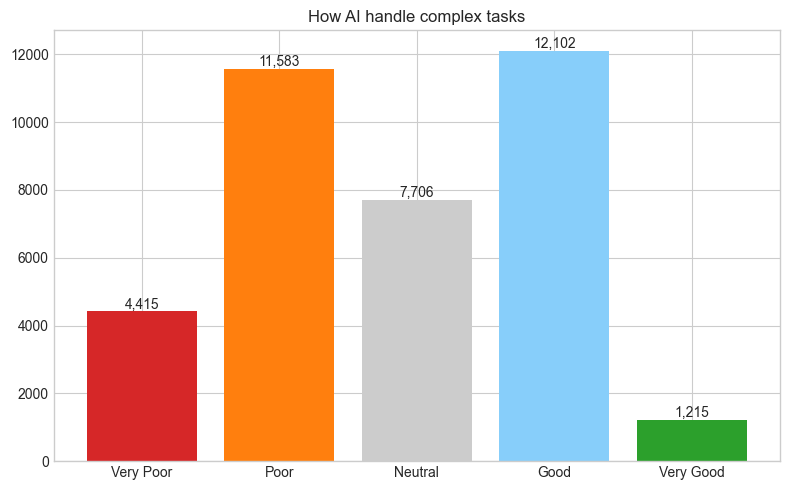

In [18]:
custom_order = [
    "Very poor at handling complex tasks",
    "Bad at handling complex tasks",
    "Neither good or bad at handling complex tasks",
    "Good, but not great at handling complex tasks",
    "Very well at handling complex tasks"
]

short_labels = ["Very Poor", "Poor", "Neutral", "Good", "Very Good"]
colors = ['#d62728', '#ff7f0e', '#cccccc', '#87cefa', '#2ca02c']

# Get and reorder counts
counts = df['AIComplex'].value_counts().reindex(custom_order)

plt.figure(figsize=(8, 5))
bars = plt.bar(short_labels, counts.values, color=colors)

# Add count labels just like the previous plot
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,}', ha='center', va='bottom')

plt.title('How AI handle complex tasks')
plt.ylabel('')
plt.tight_layout()
plt.show()


People see AI as useful but flawed when it comes to complex tasks, so they are more cautious and not overly optimistic

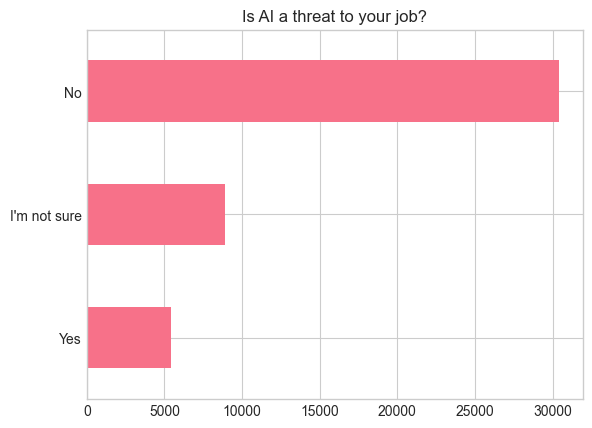

In [19]:
df['AIThreat'].value_counts().sort_values().plot(kind= 'barh', title= 'Is AI a threat to your job?', ylabel='');

The majority of people dont waver at the thought of AI taking over thier jobs!

Maybe journalists should consider this survey before publish another AI "taking over" article.

### 2. Current Tech salaries.


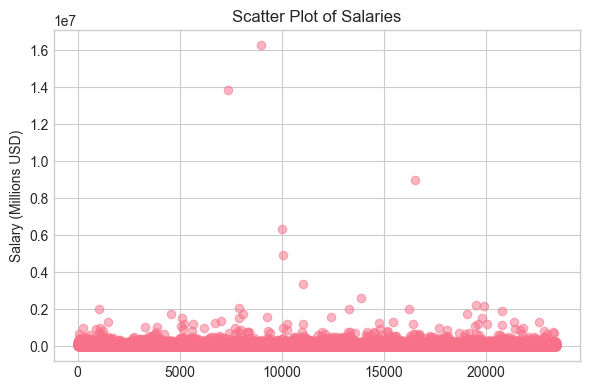

In [20]:
# Scatter plot

scatter_salary = df[['ConvertedCompYearly']].dropna()

plt.figure(figsize=(6,4))
plt.scatter(range(len(scatter_salary)), scatter_salary['ConvertedCompYearly'], alpha=0.5)

# Y-axis in millions
plt.ylabel('Salary (Millions USD)')


plt.title('Scatter Plot of Salaries')
plt.tight_layout()
plt.show()

We notice some outliers after +300k, Lets use the interquartile method to detect outliers

In [21]:
salaries = df['ConvertedCompYearly']

p25 = salaries.quantile(0.25)
p50 = salaries.quantile(0.50) # for later use
p75 = salaries.quantile(0.75)
p90 = salaries.quantile(0.90) # for later use

IQR = p75 - p25
high_bound = p75 + (1.5 * IQR)
low_bound = p25 - (1.5 * IQR)

print(f'High outliers starts at = {high_bound}')
print(f'Low outliers starts at = {low_bound}')

High outliers starts at = 220860.75
Low outliers starts at = -80177.25


This means we dont have outliers at the lower end, however in the higher end they start after 220k

In [22]:
comp_df = df[(df['ConvertedCompYearly'] >= low_bound) & (df['ConvertedCompYearly'] <= high_bound)]

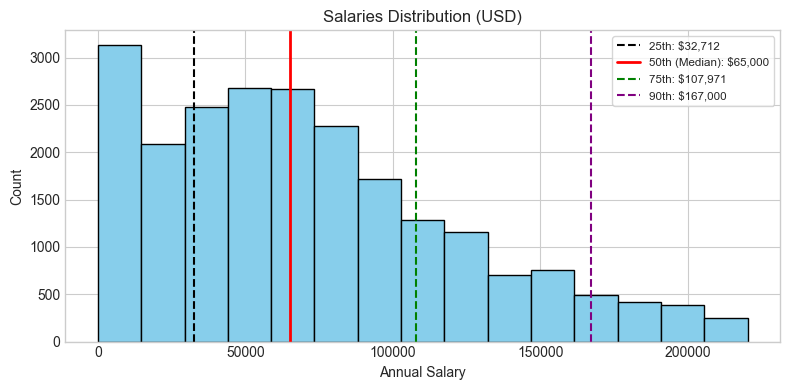

In [23]:
salaries = comp_df['ConvertedCompYearly']
plt.figure(figsize=(8, 4))
plt.hist(salaries, bins=15, color='skyblue', edgecolor='black')

# Percentile lines
plt.axvline(p25, color='black', linestyle='dashed', linewidth=1.5, label=f'25th: ${int(p25):,}')
plt.axvline(p50, color='red', linestyle='solid', linewidth=2, label=f'50th (Median): ${int(p50):,}')
plt.axvline(p75, color='green', linestyle='dashed', linewidth=1.5, label=f'75th: ${int(p75):,}')
plt.axvline(p90, color='purple', linestyle='dashed', linewidth=1.5, label=f'90th: ${int(p90):,}')

plt.title('Salaries Distribution (USD)')
plt.xlabel('Annual Salary')
plt.ylabel('Count')
plt.legend(loc='upper right', frameon=True, fontsize='small')
plt.tight_layout()
plt.show()


- Median salary for a developer is $33k
- %90 of developers earns less than $149k

Lets take a peak at our high earners

In [24]:
high_earner_threshold = comp_df['ConvertedCompYearly'].quantile(0.9)
high_earners = comp_df[comp_df['ConvertedCompYearly'] >= high_earner_threshold]

high_earners.shape

(2248, 16)

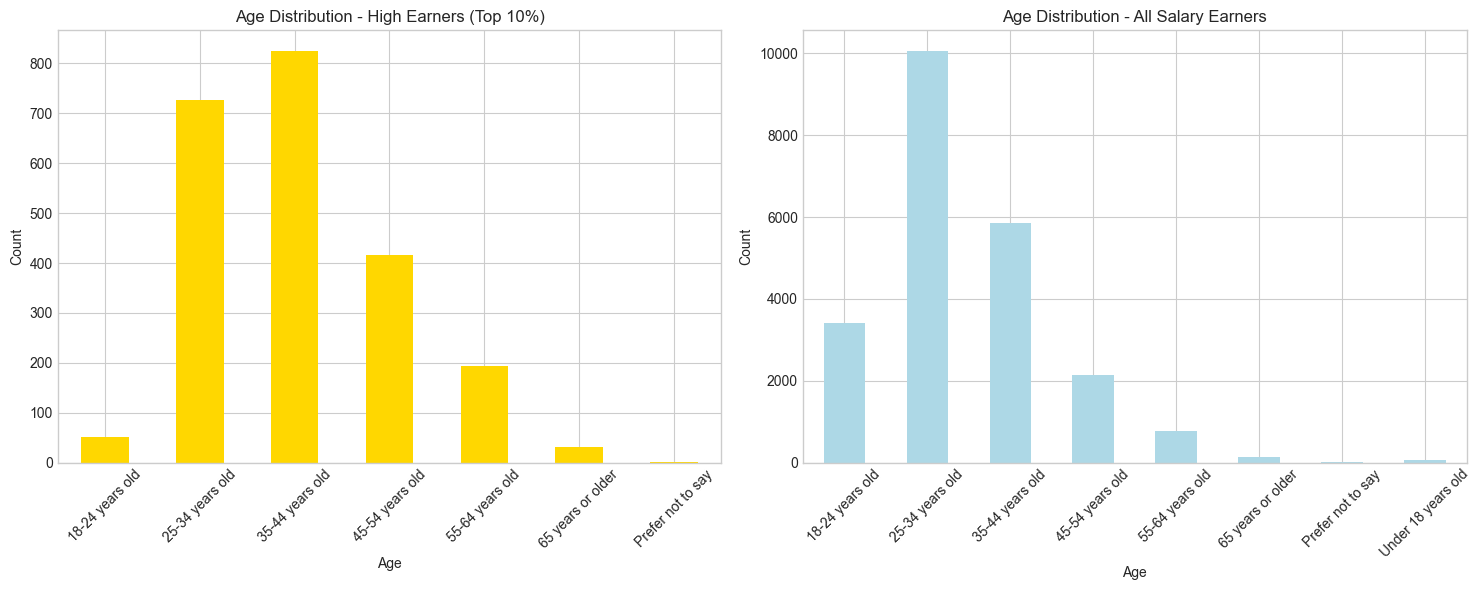

In [25]:
# Age distribution comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# High earners age distribution
high_earners['Age'].value_counts().sort_index().plot(kind='bar', ax=ax1, color='gold')
ax1.set_title('Age Distribution - High Earners (Top 10%)')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# All earners age distribution for comparison
comp_df['Age'].value_counts().sort_index().plot(kind='bar', ax=ax2, color='lightblue')
ax2.set_title('Age Distribution - All Salary Earners')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- Young devs (18-24) rarely earn top-tier salaries, expected due to less experience.
- Top earners peak in the 25–44 age group, the prime earning bracket.
- 55 and older are sparse, maybe due to migration to leadership roles and arent reported as developers


In [26]:
comp_df[['WorkExp','ConvertedCompYearly']].dropna().sort_values(by= 'WorkExp').head(50)

,WorkExp,ConvertedCompYearly
10614,0.0,1436.0
542,0.0,3618.0
41174,0.0,9571.0
5090,0.0,25777.0
5293,0.0,34395.0
27716,0.0,1826.0
26625,0.0,5671.0
27776,0.0,47470.0
26562,0.0,23200.0
25662,0.0,6517.0


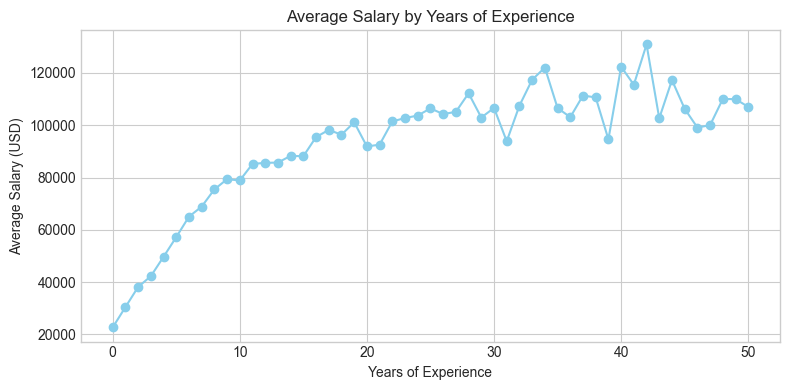

In [27]:
df_exp = comp_df[['WorkExp', 'ConvertedCompYearly']].dropna()

# Group by WorkExp and calculate mean salary
avg_salary_by_exp = df_exp.groupby('WorkExp')['ConvertedCompYearly'].mean()

# Plot
plt.figure(figsize=(8, 4))
plt.plot(avg_salary_by_exp.index, avg_salary_by_exp.values, marker='o', color='skyblue')
plt.title('Average Salary by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

- New developers start around $23k and see dramatic salary increases in their
first decade
- Salary growth plateaus around $100-110k for the 10-25 year experience range       
- Career advancement likely requires additional factors: leadership roles,
specialization, or company changes
- Wild swings between $115k-$130k+ likely due to small sample sizes at these        
experience levels
- High earners at this level probably in executive/architectural roles rather       
than individual contributors


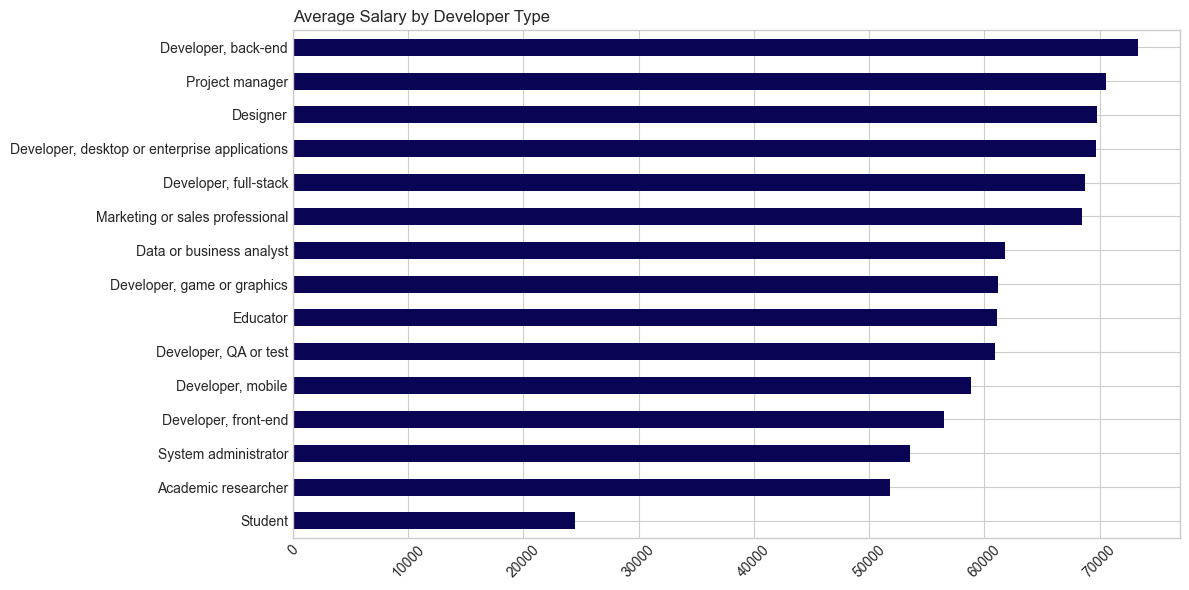

In [28]:
df_dev = comp_df[['DevType', 'ConvertedCompYearly']].dropna()

avg_salary_by_devtype = df_dev.groupby('DevType')['ConvertedCompYearly'].mean().sort_values(ascending=True).head(15)

plt.figure(figsize=(12, 6))
avg_salary_by_devtype.plot(kind='barh', color= "#090454", grid= True)
plt.title('Average Salary by Developer Type', loc= 'left')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Transitioning to project management offers the highest salary potential
- Deep expertise in DevOps, gaming, or data science pays premium wages
- Full-stack capabilities command competitive salaries across the market
- Educational and research roles offer non-monetary benefits but lower compensation



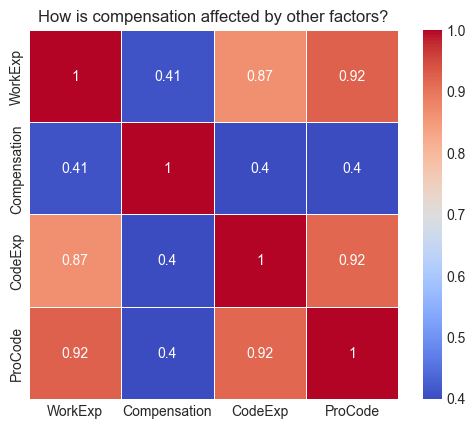

''

In [29]:
# Lets convert all values to floats as it has strings "less/More than..."
columns_to_clean = ['YearsCode', 'YearsCodePro']

for c in columns_to_clean:
    comp_df[c] = comp_df[c].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}).astype(float)


corr_map = comp_df[['WorkExp','ConvertedCompYearly','YearsCode', 'YearsCodePro']]
corr_map = corr_map.rename(columns= {'ConvertedCompYearly': 'Compensation', 'YearsCodePro': 'ProCode', 'YearsCode': 'CodeExp'})
corr_map = corr_map.corr()

ax = sns.heatmap(corr_map, linewidths= 0.5, square=True,  cmap="coolwarm", annot= True)
plt.title('How is compensation affected by other factors?')
plt.show()
;

- The 0.4 correlation means experience explains only ~25% of salary variation, reveals that its not the only factor
- Strong correlation between total coding time and professional coding, suggesting most serious coders eventually turn professional

### 3. Demographic of Developers

In [30]:
df[["Age", "EdLevel"]].isnull().sum()

Age           0
EdLevel    4653
dtype: int64

In [31]:
df['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

In [32]:
age_mode = df['Age'].mode()[0]

# Replace the values
df['Age'] = df['Age'].replace(
    ["Prefer not to say"], 
    age_mode
)

In [33]:
# shorten the labels for both age and education level

age_short = {"25-34 years old": "25-34", 
             "35-44 years old": "35-44",
             "18-24 years old": "18-24",
             "45-54 years old": "45-54",
             "55-64 years old": "55-64",
             "Under 18 years old": "Under 18",
             "65 years or older": "Over 65",
             "Prefer not to say": "Not Specified"}




edu_map = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor's",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master's",
    "Some college/university study without earning a degree": "College Dropout",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "High School",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Doctorate/Prof",
    "Associate degree (A.A., A.S., etc.)": "Associate",
    "Primary/elementary school": "Primary School",
    "Something else": "Other"
}

df['EdLevelShort'] = df['EdLevel'].map(edu_map)
df['AgeShort'] = df['Age'].map(age_short)


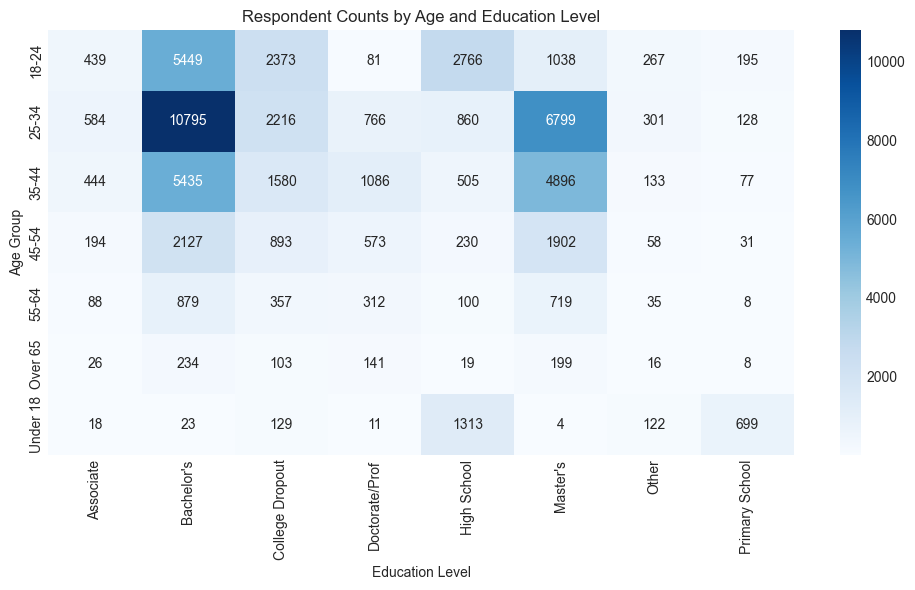

In [34]:
edu_by_age = df.pivot_table(index="AgeShort", columns="EdLevelShort", aggfunc="size", fill_value=0)
edu_by_age.sort_index

plt.figure(figsize=(10, 6))
sns.heatmap(edu_by_age, annot=True, fmt="d", cmap="Blues")
plt.title("Respondent Counts by Age and Education Level")
plt.xlabel("Education Level")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()


- Young developers with Bachelor's degrees dominate the dataset.
- Most common degree is Bachelor's among all age groups, followed by Master's.
- Master’s degrees are concentrated mostly in the 25–44 age range, any pursue advanced degrees mid-career for advancement.
- High school and primary school respondents appear more in Under 18 and some 18–24, showing many young developers are self-taught or still in
  education


### 4. Popularity of remote work.


In [35]:
remote_counts = df['RemoteWork'].value_counts()

remote_counts

RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

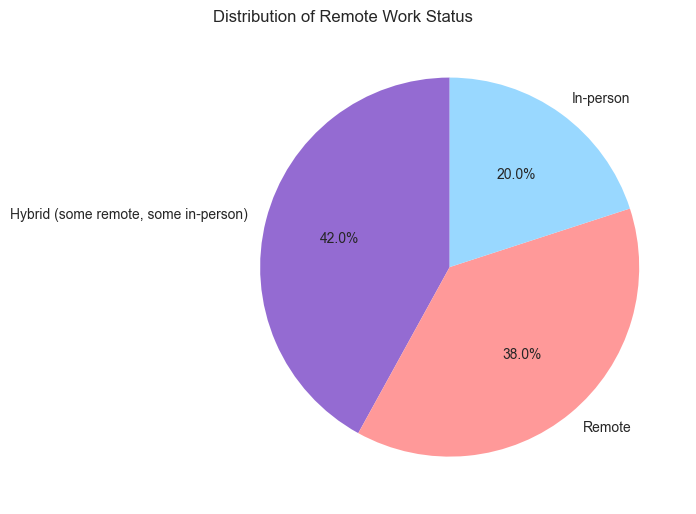

In [36]:
colors = ["#946bd2","#ff9999","#99d8ff"]


plt.figure(figsize=(7, 7))
plt.pie(
    remote_counts,
    labels=remote_counts.index,
    autopct='%.1f%%',
    startangle=90,
    colors= colors
)
plt.title('Distribution of Remote Work Status', loc= 'left')
plt.tight_layout()
plt.show()

Most participant are working hybrid, followed by remote in a close lead, however in-person share is only 20%.



In [37]:
df['Age'].value_counts()

Age
25-34 years old       24233
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Name: count, dtype: int64

''

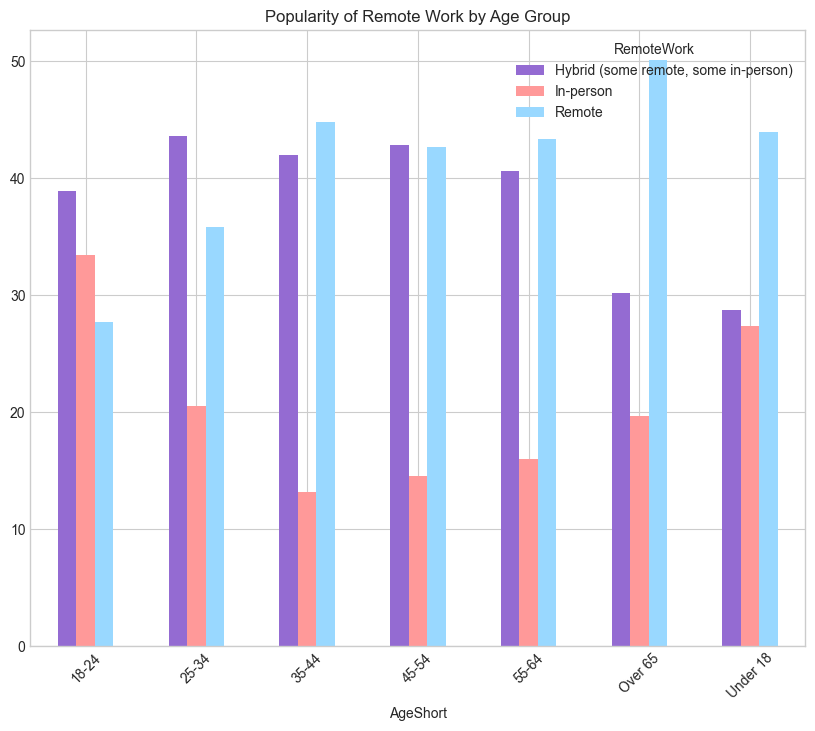

In [38]:
age_order = [
    'Under 18', '18-24', '25-34', '35-44',
    '45-54', '55-64', 'Over 65'
]

age_remote = df[['AgeShort', 'RemoteWork']].dropna()

remote_by_age = age_remote.groupby(['AgeShort', 'RemoteWork']).size().unstack(fill_value= 0)


remote_by_age_group = remote_by_age.reindex(age_order)

# shows the pcnt of each group rather than raw count to address sampling issues
remote_by_age = remote_by_age.div(remote_by_age.sum(axis=1), axis=0) * 100

remote_by_age.plot(kind= 'bar', figsize= (10,8), color = colors)
plt.title('Popularity of Remote Work by Age Group')
plt.xticks(rotation= 45)

;

- Early-career developers are more likely to work in-person due to requiring more supervision/mentoring or fewer remote roles 
- Older professionals prefers more remote roles/hybrid with far fewer in-person roles, suggesting an inverse relationship between age and remote work.

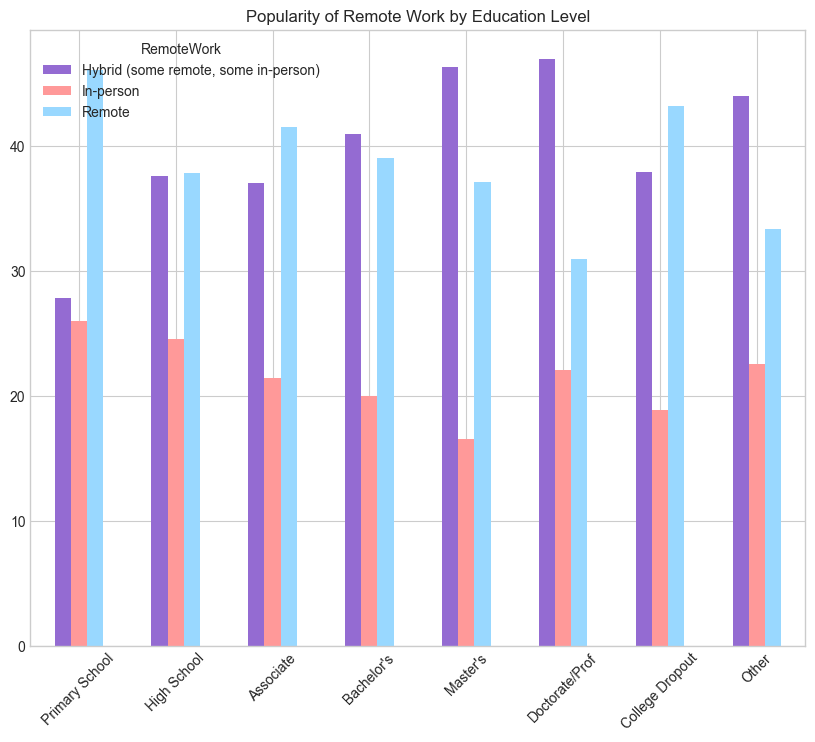

''

In [39]:
edu_order = ["Primary School", "High School", "Associate", "Bachelor's", "Master's", "Doctorate/Prof", "College Dropout", "Other"]


edu_remote = df[['EdLevelShort', 'RemoteWork']].dropna()

remote_by_edu = edu_remote.groupby(['EdLevelShort', 'RemoteWork']).size().unstack(fill_value=0)

remote_by_edu = remote_by_edu.reindex(edu_order)


remote_by_edu_pct = remote_by_edu.div(remote_by_edu.sum(axis=1), axis=0) * 100

remote_by_edu_pct.plot(kind= 'bar', figsize= (10,8), color = colors)
plt.title('Popularity of Remote Work by Education Level')
plt.xticks(rotation= 45)
plt.xlabel('')
plt.show()

;

- We see a trend here where hybrid is most dominant style of work.
- Surprisingly, Primary School, Associates, College dropouts are the most common group that works fully remotely.
- Formal educated developers prefer to work more hybrid or in-person, likely do 

### 5. Why you code?.


In [40]:
df['CodingActivities'].unique()

array(['Hobby',
       'Hobby;Contribute to open-source projects;Other (please specify):',
       nan, 'I don’t code outside of work', 'Bootstrapping a business',
       'Hobby;Contribute to open-source projects',
       'Hobby;School or academic work',
       'Hobby;Contribute to open-source projects;Professional development or self-paced learning from online courses',
       'Hobby;Professional development or self-paced learning from online courses',
       'Contribute to open-source projects;Other (please specify):',
       'Contribute to open-source projects',
       'Hobby;Freelance/contract work',
       'Professional development or self-paced learning from online courses',
       'Hobby;Other (please specify):;Bootstrapping a business',
       'Freelance/contract work',
       'Contribute to open-source projects;Bootstrapping a business;School or academic work',
       'Contribute to open-source projects;Bootstrapping a business;Freelance/contract work',
       'Hobby;Contribute

''

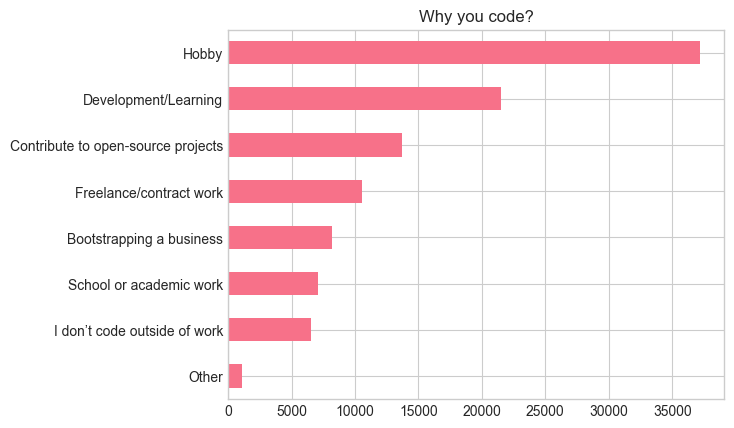

In [42]:
# Same treatment as AI Usage columns from before

code_reason = df['CodingActivities'].str.split(';').explode().replace('Other (please specify):', 'Other').replace('Professional development or self-paced learning from online courses', 'Development/Learning')

code_reason.value_counts().sort_values().plot(kind= 'barh')
plt.ylabel('')
plt.title('Why you code?')
;

- Large portion of developers are driven by personal interest and enjoyment, not just work-related demands, I know i have a ton of projects in the backlog.
- Second reason is learning, which indicate strong growth mindset within the community of stack overflow.
- While people does code for a living, most are doing it for more intrinsic reasons.
- Developers often become founders, creating new companies and solutions.
- Some developers maintain strict work-life separation (~6000 responses).
